In [1]:
# dataframe and series 
import pandas as pd
import numpy as np
import scipy
import math

# sklearn imports 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics.pairwise as pw
from sklearn.metrics.pairwise import pairwise_distances

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

import random
from scipy import sparse
from scipy.stats import pearsonr
import re

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/data-work/data_work")
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400
...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,"08 31, 2017",A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},The Dirt Guy,I used this cleaner as part of the first step ...,Amazing Cleaner,1504137600
399996,3.0,True,"03 21, 2016",A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},Joel C.,The flashlight is fairly cheaply made and I ha...,Once installed it worked great.,1458518400
399997,5.0,True,"11 4, 2017",A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},LEROY A DUCK,Does what its suppose to.,Works well,1509753600
399998,5.0,True,"05 31, 2015",A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},Rick C.,great,Five Stars,1433030400


In [3]:
data.query('reviewerID == "AJC7PEKZT4KFB"')

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
13689,4.0,True,"07 4, 2016",AJC7PEKZT4KFB,0780626702,{'Format:': ' Blu-ray'},Lyndall Cole,Good movie.,Four Stars,1467590400
20046,5.0,True,"06 23, 2015",AJC7PEKZT4KFB,0783226535,{'Format:': ' Blu-ray'},Lyndall Cole,Exactly what I expected. No complaints.,Five Stars,1435017600
26423,5.0,True,"06 23, 2015",AJC7PEKZT4KFB,0783240066,{'Format:': ' DVD'},Lyndall Cole,Exactly what I expected. No complaints.,Five Stars,1435017600
29924,4.0,True,"07 4, 2016",AJC7PEKZT4KFB,0783229399,{'Format:': ' DVD'},Lyndall Cole,Good movie.,Four Stars,1467590400
38094,4.0,True,"06 14, 2017",AJC7PEKZT4KFB,0790731215,{'Format:': ' Blu-ray'},Lyndall Cole,"Good product and service, no complaints.",Four Stars,1497398400
45330,4.0,True,"07 11, 2014",AJC7PEKZT4KFB,0790737744,{'Format:': ' Blu-ray'},Lyndall Cole,Good movie,Four Stars,1405036800
69871,4.0,True,"02 3, 2017",AJC7PEKZT4KFB,0793961009,{'Format:': ' Blu-ray'},Lyndall Cole,"Good product, good service, no complaints.",Four Stars,1486080000
81079,4.0,True,"12 23, 2015",AJC7PEKZT4KFB,1572524421,{'Format:': ' DVD'},Lyndall Cole,"Good product, great service, no complaints.",Four Stars,1450828800
94385,4.0,True,"06 14, 2017",AJC7PEKZT4KFB,6300181510,{'Format:': ' Blu-ray'},Lyndall Cole,"Good product and service, no complaints.",Four Stars,1497398400
106078,5.0,True,"06 23, 2015",AJC7PEKZT4KFB,6300214044,{'Format:': ' DVD'},Lyndall Cole,Exactly what I expected. No complaints.,Five Stars,1435017600


In [4]:
data = pd.read_csv("/kaggle/input/data-work/data_work")
data['reviewText']=data['reviewText'].str.lower()
import string
string.punctuation 
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc
data['review_clean'] = data['reviewText'].apply(lambda x: remove_punctuation(x))
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,so sorry i didn't purchase this years ago when...,Amazing!,1352419200,so sorry i didnt purchase this years ago when ...
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,believe me when i tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,believe me when i tell you that you will recei...
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"i have seen x live many times, both in the ear...",A great document of a great band,1114041600,i have seen x live many times both in the earl...
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"i was so excited for this! finally, a live co...",YES!! X LIVE!!,1112745600,i was so excited for this finally a live conc...
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,x is one of the best punk bands ever. i don't ...,X have still got it,1291334400,x is one of the best punk bands ever i dont ev...


In [5]:
def calc_sentiment_with_neutral(overall):
    '''encoding the sentiments of the ratings.'''
    if overall == 5 or overall == 4:
        return 2
    elif overall == 1 or overall==2 : 
        return 0
    else:
        return 1
data['sentiment'] = data['overall'].apply(calc_sentiment_with_neutral)
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,so sorry i didn't purchase this years ago when...,Amazing!,1352419200,so sorry i didnt purchase this years ago when ...,2
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,believe me when i tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,believe me when i tell you that you will recei...,2
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"i have seen x live many times, both in the ear...",A great document of a great band,1114041600,i have seen x live many times both in the earl...,2
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"i was so excited for this! finally, a live co...",YES!! X LIVE!!,1112745600,i was so excited for this finally a live conc...,2
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,x is one of the best punk bands ever. i don't ...,X have still got it,1291334400,x is one of the best punk bands ever i dont ev...,2
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,"08 31, 2017",A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},The Dirt Guy,i used this cleaner as part of the first step ...,Amazing Cleaner,1504137600,i used this cleaner as part of the first step ...,2
399996,3.0,True,"03 21, 2016",A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},Joel C.,the flashlight is fairly cheaply made and i ha...,Once installed it worked great.,1458518400,the flashlight is fairly cheaply made and i ha...,1
399997,5.0,True,"11 4, 2017",A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},LEROY A DUCK,does what its suppose to.,Works well,1509753600,does what its suppose to,2
399998,5.0,True,"05 31, 2015",A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},Rick C.,great,Five Stars,1433030400,great,2


In [6]:
def calc_two_sentiment(overall):
    '''This function encodes the rating 1 and 2 as 0, others as 1'''
    if overall >= 3:
        return 1
    else:
        return 0
data['sentiment'] = data['overall'].apply(calc_two_sentiment)
data['sentiment'].value_counts()

1    370010
0     29990
Name: sentiment, dtype: int64

In [7]:
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,so sorry i didn't purchase this years ago when...,Amazing!,1352419200,so sorry i didnt purchase this years ago when ...,1
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,believe me when i tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,believe me when i tell you that you will recei...,1
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"i have seen x live many times, both in the ear...",A great document of a great band,1114041600,i have seen x live many times both in the earl...,1
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"i was so excited for this! finally, a live co...",YES!! X LIVE!!,1112745600,i was so excited for this finally a live conc...,1
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,x is one of the best punk bands ever. i don't ...,X have still got it,1291334400,x is one of the best punk bands ever i dont ev...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,"08 31, 2017",A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},The Dirt Guy,i used this cleaner as part of the first step ...,Amazing Cleaner,1504137600,i used this cleaner as part of the first step ...,1
399996,3.0,True,"03 21, 2016",A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},Joel C.,the flashlight is fairly cheaply made and i ha...,Once installed it worked great.,1458518400,the flashlight is fairly cheaply made and i ha...,1
399997,5.0,True,"11 4, 2017",A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},LEROY A DUCK,does what its suppose to.,Works well,1509753600,does what its suppose to,1
399998,5.0,True,"05 31, 2015",A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},Rick C.,great,Five Stars,1433030400,great,1


In [8]:
data.isnull().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
style             0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
review_clean      0
sentiment         0
dtype: int64

In [9]:
data_right = data.query("sentiment == 1")
data_right

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,so sorry i didn't purchase this years ago when...,Amazing!,1352419200,so sorry i didnt purchase this years ago when ...,1
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,believe me when i tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,believe me when i tell you that you will recei...,1
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"i have seen x live many times, both in the ear...",A great document of a great band,1114041600,i have seen x live many times both in the earl...,1
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"i was so excited for this! finally, a live co...",YES!! X LIVE!!,1112745600,i was so excited for this finally a live conc...,1
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,x is one of the best punk bands ever. i don't ...,X have still got it,1291334400,x is one of the best punk bands ever i dont ev...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,"08 31, 2017",A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},The Dirt Guy,i used this cleaner as part of the first step ...,Amazing Cleaner,1504137600,i used this cleaner as part of the first step ...,1
399996,3.0,True,"03 21, 2016",A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},Joel C.,the flashlight is fairly cheaply made and i ha...,Once installed it worked great.,1458518400,the flashlight is fairly cheaply made and i ha...,1
399997,5.0,True,"11 4, 2017",A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},LEROY A DUCK,does what its suppose to.,Works well,1509753600,does what its suppose to,1
399998,5.0,True,"05 31, 2015",A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},Rick C.,great,Five Stars,1433030400,great,1


Данных довольно много, поэтому сделаю все для 2000 лучших пользователей и 1000 товаров

In [10]:
data_right['Reviewer_Count'] = data_right['reviewerID'].map(data_right['reviewerID'].value_counts())
data_right['product_Count'] = data_right['asin'].map(data_right['asin'].value_counts())


/tmp/ipykernel_34/290684548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_right['Reviewer_Count'] = data_right['reviewerID'].map(data_right['reviewerID'].value_counts())
/tmp/ipykernel_34/290684548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_right['product_Count'] = data_right['asin'].map(data_right['asin'].value_counts())


In [11]:
data_right = data_right.sort_values(by=['Reviewer_Count'],ascending=False)

In [12]:
data_right['reviewerID'].nunique()

199474

In [13]:
data_right.drop_duplicates(subset='reviewerID', inplace=True)


In [14]:
data_right

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment,Reviewer_Count,product_Count
267202,3.0,True,"02 17, 2009",A16CZRQL23NOIW,6303257275,{'Format:': ' DVD'},Hiram Gmez Pardo Venezuela,the main factor that one should remark around ...,A film pregnant of good intentions!,1234828800,the main factor that one should remark around ...,1,379,108
209441,5.0,True,"11 28, 2008",A1GGOC9PVDXW7Z,6302477786,{'Format:': ' VHS Tape'},Annie Van Auken,the correct name of the videotape pictured is ...,Program list provided for this amazing collect...,1227830400,the correct name of the videotape pictured is ...,1,290,6
221383,4.0,True,"06 26, 2001",A7Y6AVS576M03,6302719038,{'Format:': ' VHS Tape'},gobirds2,burt reynolds in the title role takes out reve...,Very Violent but Good Spaghetti Western,993513600,burt reynolds in the title role takes out reve...,1,278,9
250257,5.0,True,"06 25, 2007",A10ODC971MDHV8,6303077781,{'Format:': ' DVD'},John Farr,bresson's spare but breathless film mesmerizes...,A Man Escaped,1182729600,bressons spare but breathless film mesmerizes ...,1,272,34
217357,4.0,True,"02 23, 2009",ANCOMAI0I7LVG,6302655897,{'Format:': ' DVD'},Andrew Ellington,i've recently become a huge fan of elizabeth t...,"Suddenly, it hits you like a ton of bricks...",1235347200,ive recently become a huge fan of elizabeth ta...,1,241,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238675,4.0,True,"10 9, 2007",A154I3TYZRW6W8,6303004776,{'Format:': ' DVD'},Kindle Customer,we got our first television around 1950. i wa...,OF MING AND MONGO,1191888000,we got our first television around 1950 i was...,1,1,31
238685,4.0,True,"12 24, 2003",ANBIP299T8OBX,6303046975,{'Format:': ' VHS Tape'},Real Person from the Real World,reviewers are right on.. that the sets are one...,A Curious Old Flick,1072224000,reviewers are right on that the sets are one o...,1,1,36
238690,3.0,True,"10 13, 2007",ALHIXZWFNNZPW,6303047025,{'Format:': ' DVD'},JMcH,while this film is by no means great (or terri...,"Disturbing, Flawed Gore Pic",1192233600,while this film is by no means great or terrib...,1,1,118
238691,3.0,True,"03 27, 2007",ALQQIHJI4937D,6303047025,{'Format:': ' DVD'},William G. Pratt,i expected a movie of abominable quality when ...,Not As Bad As I Thought It Would Be,1174953600,i expected a movie of abominable quality when ...,1,1,118


In [15]:
data_right.reset_index(drop=True,inplace=True) 

In [16]:
data_right.isna().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
style             0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
review_clean      0
sentiment         0
Reviewer_Count    0
product_Count     0
dtype: int64

In [17]:
data_recommendation_1 = data_right.loc[data_right['Reviewer_Count']>9]
data_recommendation_1

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment,Reviewer_Count,product_Count
0,3.0,True,"02 17, 2009",A16CZRQL23NOIW,6303257275,{'Format:': ' DVD'},Hiram Gmez Pardo Venezuela,the main factor that one should remark around ...,A film pregnant of good intentions!,1234828800,the main factor that one should remark around ...,1,379,108
1,5.0,True,"11 28, 2008",A1GGOC9PVDXW7Z,6302477786,{'Format:': ' VHS Tape'},Annie Van Auken,the correct name of the videotape pictured is ...,Program list provided for this amazing collect...,1227830400,the correct name of the videotape pictured is ...,1,290,6
2,4.0,True,"06 26, 2001",A7Y6AVS576M03,6302719038,{'Format:': ' VHS Tape'},gobirds2,burt reynolds in the title role takes out reve...,Very Violent but Good Spaghetti Western,993513600,burt reynolds in the title role takes out reve...,1,278,9
3,5.0,True,"06 25, 2007",A10ODC971MDHV8,6303077781,{'Format:': ' DVD'},John Farr,bresson's spare but breathless film mesmerizes...,A Man Escaped,1182729600,bressons spare but breathless film mesmerizes ...,1,272,34
4,4.0,True,"02 23, 2009",ANCOMAI0I7LVG,6302655897,{'Format:': ' DVD'},Andrew Ellington,i've recently become a huge fan of elizabeth t...,"Suddenly, it hits you like a ton of bricks...",1235347200,ive recently become a huge fan of elizabeth ta...,1,241,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2433,5.0,True,"11 2, 2013",A1EU66488BUQC2,6300988600,{'Format:': ' Blu-ray'},Foul Pet,if you're looking at it then you know you're a...,Blu Ray,1383350400,if youre looking at it then you know youre a f...,1,10,547
2434,5.0,True,"03 2, 2017",A2T8T9900546PX,6301973461,{'Format:': ' DVD'},wili1,a classic musical to pink floyd's music. i bo...,It did not fail to entertain!,1488412800,a classic musical to pink floyds music i boug...,1,10,223
2435,5.0,True,"11 5, 2012",A2T4EW4DKJQP18,0790748193,{'Format:': ' DVD'},Mack Phillips,this movie came to me in brand new condition. ...,Message in a Bottle,1352073600,this movie came to me in brand new condition i...,1,10,212
2436,4.0,True,"10 1, 2011",A29WXAG813FS7A,0790729628,{'Format:': ' DVD'},Heather Goliber,this is a great movie for those that are not o...,Harrison Ford,1317427200,this is a great movie for those that are not o...,1,10,2136


In [18]:
data_recommendation_1['reviewerID'].nunique()

2438

In [19]:
data_recommendation = data_recommendation_1.loc[data_recommendation_1['product_Count']>10]
print(data_recommendation['reviewerID'].nunique())
print(data_recommendation['asin'].nunique())


2326
1104


Попробую сделать больше выборку. Например увеличить до 4000 id пользователей и 1705 лучших товаров

In [20]:
data_recommendation_2 = data_right.loc[data_right['Reviewer_Count']>6]
data_recommendation_big = data_recommendation_2.loc[data_recommendation_2['product_Count']>3]
print(data_recommendation_big['reviewerID'].nunique())
print(data_recommendation_big['asin'].nunique())

4697
1705


In [21]:
data_recommendation.to_csv('/kaggle/working/data_mini.csv',index = False)
data_recommendation_big.to_csv('/kaggle/working/data_big.csv',index = False) 

In [22]:
data_recommendation.reset_index(drop=True, inplace=True)

In [23]:
data_recommendation

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment,Reviewer_Count,product_Count
0,3.0,True,"02 17, 2009",A16CZRQL23NOIW,6303257275,{'Format:': ' DVD'},Hiram Gmez Pardo Venezuela,the main factor that one should remark around ...,A film pregnant of good intentions!,1234828800,the main factor that one should remark around ...,1,379,108
1,5.0,True,"06 25, 2007",A10ODC971MDHV8,6303077781,{'Format:': ' DVD'},John Farr,bresson's spare but breathless film mesmerizes...,A Man Escaped,1182729600,bressons spare but breathless film mesmerizes ...,1,272,34
2,4.0,True,"02 23, 2009",ANCOMAI0I7LVG,6302655897,{'Format:': ' DVD'},Andrew Ellington,i've recently become a huge fan of elizabeth t...,"Suddenly, it hits you like a ton of bricks...",1235347200,ive recently become a huge fan of elizabeth ta...,1,241,136
3,5.0,True,"09 17, 2005",A2NJO6YE954DBH,6301767918,{'Format:': ' DVD'},Lawrance Bernabo,"""zulu"" is an epic action film with thousands o...",The finest depiction of British regulars in ci...,1126915200,zulu is an epic action film with thousands of ...,1,225,368
4,3.0,True,"05 7, 2005",A2B73CL3QSYWLB,6301967917,{'Format:': ' DVD'},David E. Baldwin,the freedom afforded young american directors ...,Goofy Seventies Cop Film,1115424000,the freedom afforded young american directors ...,1,218,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,5.0,True,"11 2, 2013",A1EU66488BUQC2,6300988600,{'Format:': ' Blu-ray'},Foul Pet,if you're looking at it then you know you're a...,Blu Ray,1383350400,if youre looking at it then you know youre a f...,1,10,547
2322,5.0,True,"03 2, 2017",A2T8T9900546PX,6301973461,{'Format:': ' DVD'},wili1,a classic musical to pink floyd's music. i bo...,It did not fail to entertain!,1488412800,a classic musical to pink floyds music i boug...,1,10,223
2323,5.0,True,"11 5, 2012",A2T4EW4DKJQP18,0790748193,{'Format:': ' DVD'},Mack Phillips,this movie came to me in brand new condition. ...,Message in a Bottle,1352073600,this movie came to me in brand new condition i...,1,10,212
2324,4.0,True,"10 1, 2011",A29WXAG813FS7A,0790729628,{'Format:': ' DVD'},Heather Goliber,this is a great movie for those that are not o...,Harrison Ford,1317427200,this is a great movie for those that are not o...,1,10,2136


In [24]:
data_recommendation_big.reset_index(drop=True, inplace=True)

In [25]:
data_recommendation_big

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment,Reviewer_Count,product_Count
0,3.0,True,"02 17, 2009",A16CZRQL23NOIW,6303257275,{'Format:': ' DVD'},Hiram Gmez Pardo Venezuela,the main factor that one should remark around ...,A film pregnant of good intentions!,1234828800,the main factor that one should remark around ...,1,379,108
1,5.0,True,"11 28, 2008",A1GGOC9PVDXW7Z,6302477786,{'Format:': ' VHS Tape'},Annie Van Auken,the correct name of the videotape pictured is ...,Program list provided for this amazing collect...,1227830400,the correct name of the videotape pictured is ...,1,290,6
2,4.0,True,"06 26, 2001",A7Y6AVS576M03,6302719038,{'Format:': ' VHS Tape'},gobirds2,burt reynolds in the title role takes out reve...,Very Violent but Good Spaghetti Western,993513600,burt reynolds in the title role takes out reve...,1,278,9
3,5.0,True,"06 25, 2007",A10ODC971MDHV8,6303077781,{'Format:': ' DVD'},John Farr,bresson's spare but breathless film mesmerizes...,A Man Escaped,1182729600,bressons spare but breathless film mesmerizes ...,1,272,34
4,4.0,True,"02 23, 2009",ANCOMAI0I7LVG,6302655897,{'Format:': ' DVD'},Andrew Ellington,i've recently become a huge fan of elizabeth t...,"Suddenly, it hits you like a ton of bricks...",1235347200,ive recently become a huge fan of elizabeth ta...,1,241,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4692,3.0,True,"03 11, 2000",A2ICI500LRO01K,0783229569,{'Format:': ' DVD'},Kyle Wells,when i first saw this film i didn't care for i...,Interesting at least.,952732800,when i first saw this film i didnt care for it...,1,7,386
4693,5.0,True,"08 7, 2015",AUBB7WK2JJJR5,0767815335,{'Format:': ' DVD'},shirley gunn,love it,Five Stars,1438905600,love it,1,7,191
4694,4.0,True,"08 24, 2015",A2P739KOM4U5JB,B004I2HXRY,{'Style:': ' EPS11HC'},half fast farmer,this sharpener has more features than i really...,Fancy and works well,1440374400,this sharpener has more features than i really...,1,7,5
4695,5.0,True,"09 13, 2014",A1RG9WXNGB7EOX,B000WFXTJM,{'Color:': ' X Violet'},"Gyula Bognr, Jr.",i love these pens and i collected 12 different...,Caran D'ache Ballpoint Pen,1410566400,i love these pens and i collected 12 different...,1,7,18


In [26]:
# taking pivot table of user-item

pivot = pd.pivot_table(data_recommendation, index='reviewerID', columns=['asin'], values='overall').fillna(0)

pivot

asin,0005019281,0764003828,0764004581,0767001311,076700941X,0767015525,0767018699,0767020294,0767023765,076780046X,...,B006EI5V88,B00932TERQ,B00DQC8XU8,B00EWTLKT0,B00FX6KCMM,B00GMLTC6Y,B00HZC8SIW,B00MWVAUUA,B00NFSDTSE,B012DH2KG4
reviewerID,,,,,,,,,,,,,,,,,,,,,
A10175AMUHOQC4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A101IGU6UDKW3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103KNDW8GN92L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103W7ZPKGOCC9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A103WYBAWMAA59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZSN1TO0JI87B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZUBX0AYYNTFF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZV5NGPANACNI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
pivot_mat = pivot.values

pivot_mat[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
reviewer_id = list(pivot.index)
reviewer_id[:10]

['A10175AMUHOQC4',
 'A101IGU6UDKW3X',
 'A103KNDW8GN92L',
 'A103W7ZPKGOCC9',
 'A103WYBAWMAA59',
 'A1047CXPD3EIGU',
 'A106016KSI0YQ',
 'A106YXO3EHVD3J',
 'A107LG0JGCY77T',
 'A10BS065D6B04T']

In [29]:
# разделяющая сводная матрица
# это разреженная матрица нужна для того как многие значения равны 0
# Таким образом, в отличие от плотной матрицы, в которой хранятся все значения, разреженная матрица 
# сохраняет ненулевые значения в соответствии с индексами строк и столбцов.
sparse_matrix = csr_matrix(pivot_mat)

sparse_matrix

<2326x1104 sparse matrix of type '<class 'numpy.float64'>'
	with 2326 stored elements in Compressed Sparse Row format>

## Matrix-factorization

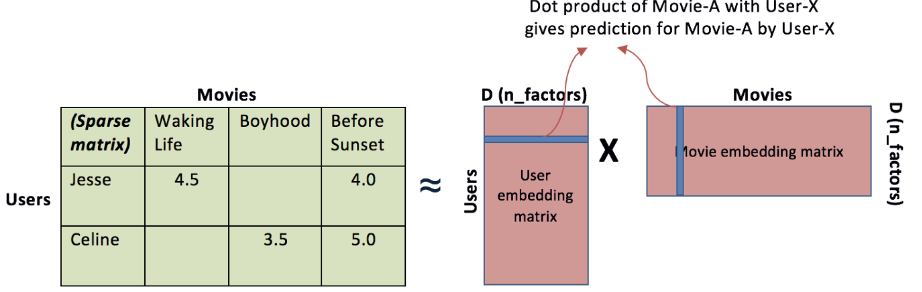

In [30]:
# factor numbers of the user-item matrix

factor_n = 15

# matrix factorization of the user-item matrix

U, sigma, V = svds(sparse_matrix, k = factor_n) #defining elements of the factorization

In [31]:
# to see and check the dimensions of matrix
print(U.shape)
print(V.shape)
sigma = np.diag(sigma)
print(sigma.shape)

(2326, 15)
(15, 1104)
(15, 15)


In [32]:
# dot product of matrix
pred_rating = np.dot(np.dot(U,sigma),V)

pred_rating[:5]

array([[ 4.08316546e-34, -2.19922307e-36,  6.41025547e-34, ...,
        -1.77968271e-34,  1.40656963e-33,  9.82836185e-34],
       [ 9.36590590e-34, -1.25766694e-36, -2.57335291e-33, ...,
        -1.07430711e-34, -2.57188428e-33,  9.54251702e-34],
       [ 3.96260716e-33, -2.65703613e-36, -9.08501902e-33, ...,
        -2.23978564e-34, -5.95693948e-33,  8.46824083e-34],
       [-7.67407344e-18,  1.79120566e-20,  1.54424817e-17, ...,
         1.44101629e-18,  3.81386521e-17, -8.23581501e-18],
       [-4.88663047e-33,  3.62309985e-36,  1.12197416e-32, ...,
         3.03873506e-34,  6.28257551e-33, -1.15454527e-33]])

Нужно нормализовать прежде чем буду что-то рекомендовать из-за нулевых значений

In [33]:
# normalizing matrix
pred_rating_n = (pred_rating - pred_rating.min()) / (pred_rating.max() - pred_rating.min())
pred_rating_n[:5]

array([[4.92495337e-15, 4.92495337e-15, 4.92495337e-15, ...,
        4.92495337e-15, 4.92495337e-15, 4.92495337e-15],
       [4.92495337e-15, 4.92495337e-15, 4.92495337e-15, ...,
        4.92495337e-15, 4.92495337e-15, 4.92495337e-15],
       [4.92495337e-15, 4.92495337e-15, 4.92495337e-15, ...,
        4.92495337e-15, 4.92495337e-15, 4.92495337e-15],
       [4.92341855e-15, 4.92495695e-15, 4.92804186e-15, ...,
        4.92524157e-15, 4.93258110e-15, 4.92330620e-15],
       [4.92495337e-15, 4.92495337e-15, 4.92495337e-15, ...,
        4.92495337e-15, 4.92495337e-15, 4.92495337e-15]])

In [34]:
pred_df = pd.DataFrame(pred_rating_n, columns = pivot.columns, index=reviewer_id).transpose()
pred_df.head(10)

,A10175AMUHOQC4,A101IGU6UDKW3X,A103KNDW8GN92L,A103W7ZPKGOCC9,A103WYBAWMAA59,A1047CXPD3EIGU,A106016KSI0YQ,A106YXO3EHVD3J,A107LG0JGCY77T,A10BS065D6B04T,...,AZC562U18BK2S,AZDH08P9ZMWKJ,AZDVOFC2MTIM5,AZIXUQRB6SNUD,AZKTCMGSO8LPZ,AZSN1TO0JI87B,AZUBX0AYYNTFF,AZV5NGPANACNI,AZWP97BZPJI1D,AZY1OM4M0YXXI
asin,,,,,,,,,,,,,,,,,,,,,
0005019281,4.924953e-15,4.924953e-15,4.924953e-15,4.923419e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.932006e-15,...,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15
0764003828,4.924953e-15,4.924953e-15,4.924953e-15,4.924957e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924951e-15,...,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15
0764004581,4.924953e-15,4.924953e-15,4.924953e-15,4.928042e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.910542e-15,...,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15
0767001311,4.924953e-15,4.924953e-15,4.924953e-15,4.928161e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.909476e-15,...,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15
076700941X,4.924953e-15,4.924953e-15,4.924953e-15,4.924491e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.927164e-15,...,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15
0767015525,4.924953e-15,4.924953e-15,4.924953e-15,4.929040e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.935654e-15,...,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15
0767018699,4.924953e-15,4.924953e-15,4.924953e-15,4.929197e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.922576e-15,...,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15
0767020294,4.924953e-15,4.924953e-15,4.924953e-15,4.925813e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.919691e-15,...,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15
0767023765,4.924953e-15,4.924953e-15,4.924953e-15,4.927604e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.921193e-15,...,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15,4.924953e-15


In [35]:
def recommend_items(user_id ,pred_df, items_df, items_to_ignore=[], top_list=20, verbose=False):
        '''this function find the most related items'''
        # taking and sorting the user's predictions
        sorted_user_predictions = pred_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'recStrength'})

        recommendations_df = sorted_user_predictions[~sorted_user_predictions['asin'].isin(items_to_ignore)] \
                               .sort_values('recStrength', ascending = False) \
                               .head(top_list)

        return recommendations_df
    

In [36]:
def recommender(user_id,pred_df,real_df,df_meta):
    '''this functions merges the title with corresponding book id and finding the 
        empty rows which means does not read by user and priting results'''
        
    recommend = recommend_items(user_id, pred_df,real_df)
    df_user= real_df.loc[real_df['reviewerID'] == user_id]
    new_df = df_user.merge(recommend, how = 'outer', left_on = 'asin', right_on = 'asin')
    rec_df = new_df.loc[new_df['overall'].isnull()==True]
    df_rec_t = rec_df.loc[:, ['asin', 'recStrength']]
    df_last = pd.merge(df_rec_t,df_meta[['title','asin']],on=['asin'], how='left') 
    return df_last

In [37]:
df_meta = pd.read_csv('/kaggle/input/title-asin/data_title_office_movies_full.csv', low_memory=False)
df_meta

,title,asin,category
0,Understanding Seizures and Epilepsy,0000695009,"['Movies & TV', 'Movies']"
1,Spirit Led&mdash;Moving By Grace In The Holy S...,0000791156,"['Movies & TV', 'Movies']"
2,My Fair Pastry (Good Eats Vol. 9),0000143529,"['Movies & TV', 'Movies']"
3,"Barefoot Contessa (with Ina Garten), Entertain...",0000143588,"['Movies & TV', 'Movies']"
4,Rise and Swine (Good Eats Vol. 7),0000143502,"['Movies & TV', 'Movies']"
...,...,...,...
519219,Nintendo Super Mario Bros. Lanyard with Mario ...,B01HJF4C66,"['Office Products', 'Office & School Supplies'..."
519220,Lot of 2 - US American Flag &amp; Eagle US Pat...,B01HJF5WZQ,"['Office Products', 'Office & School Supplies'..."
519221,CatchTheWave Natural Wood Pen Holder Folding S...,B01HJF6JIA,"['Office Products', 'Office & School Supplies'..."
519222,1pcs / Set Fashion Cartoon Blue Toy Story Phon...,B01HJFOEQ4,[]


In [38]:
df_meta.query("asin == '6303257275'")

,title,asin,category
9608,Mackenna's Gold VHS,6303257275,"['Movies & TV', 'Studio Specials', 'Sony Pictu..."


In [39]:
recommender('A16CZRQL23NOIW',pred_df,data_recommendation,df_meta)

,asin,recStrength,title
0,0790729628,4.934101e-15,Blade Runner
1,0800141709,4.927629e-15,"Dr. Strangelove: Or, How I Learned to Stop Wor..."
2,0792834976,4.926174e-15,Road House VHS
3,076700941X,4.924953e-15,Upstairs Downstairs - The Fourth Season VHS
4,076780192X,4.924953e-15,Close Encounters of the Third Kind VHS
5,076780046X,4.924953e-15,Only You VHS
6,0767023765,4.924953e-15,The Crossing VHS
7,0767020294,4.924953e-15,Jane Eyre
8,0767018699,4.924953e-15,"Avengers '66 - Set 2, Vols. 3 &amp; 4"
9,0767015525,4.924953e-15,The Avengers


In [41]:
data_recommendation.query("asin == '0800141709'")

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment,Reviewer_Count,product_Count
316,3.0,True,"10 9, 2004",A32JKNQ6BABMQ2,0800141709,{'Format:': ' VHS Tape'},abe,another great kubrik film.this is all about a ...,they should redo this only way more over the edge,1097280000,another great kubrik filmthis is all about a n...,1,32,684
324,5.0,True,"04 2, 2015",AC95L79HY5MDF,0800141709,{'Format:': ' DVD'},John Day,i love this movie.,Five Stars,1427932800,i love this movie,1,31,684
414,4.0,True,"08 22, 2011",A1AFXJ8U72MD6L,0800141709,{'Format:': ' DVD'},MISTER SJEM,this picture was released after the cuban miss...,A BIT DATED BUT STILL ARGUABLY A CLASSIC WORTH...,1313971200,this picture was released after the cuban miss...,1,27,684
489,5.0,True,"07 15, 2015",A1I1U2M5KSPY1R,0800141709,{'Format:': ' Amazon Video'},crosscountryman,"haven't seen this film in over 50 years, since...",The release date and the coincidence with Gold...,1436918400,havent seen this film in over 50 years since i...,1,24,684
588,4.0,True,"06 1, 2013",A1XOZW9A8TL7JY,0800141709,{'Format:': ' DVD'},Four Star Film Fan,"living up to its name, this satire directed by...",Dr. Strangelove (1964),1370044800,living up to its name this satire directed by ...,1,22,684
1378,5.0,True,"07 28, 2009",A239PPUVV8O0U0,0800141709,{'Format:': ' DVD'},Adam Reed,i love political satire and it doesn't get any...,I've Learned to Love It,1248739200,i love political satire and it doesnt get any ...,1,13,684
1956,5.0,True,"12 13, 2005",A1W6AMIGHPX3UQ,0800141709,{'Format:': ' DVD'},J. Merritt,stanley kubrick's work has been so over-analyz...,"""I don't like the look of this, Fred""",1134432000,stanley kubricks work has been so overanalyzed...,1,10,684
2021,5.0,True,"11 26, 2015",A3LHA9K5GRR8C4,0800141709,{'Format:': ' Amazon Video'},JohnDrakeMI6,"technology has improved, but ""politics"" are st...",Timeless examples of how Man needs to Improve ...,1448496000,technology has improved but politics are still...,1,10,684
2105,5.0,True,"02 6, 2009",A1QWEUEM90LL9D,0800141709,{'Format:': ' DVD'},Steven Travers,"in 1964 the first of the ""bomb"" movies came ou...",CLASSIC KUBRICK,1233878400,in 1964 the first of the bomb movies came out ...,1,10,684
2145,5.0,True,"09 21, 2012",A306E4DQRYEUYO,0800141709,{'Format:': ' Amazon Video'},Anthony,finally a movie (dr. strangelove).. that comes...,Dr. Strangelove,1348185600,finally a movie dr strangelove that comes to t...,1,10,684


In [40]:
data_recommendation.query("asin == '0790729628'")

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment,Reviewer_Count,product_Count
11,5.0,True,"10 31, 2017",A20EEWWSFMZ1PN,0790729628,{'Format:': ' Blu-ray'},Bernie (xyzzy),"one of them must be ""blade runner in its many ...",With the advent of Blu-ray many classics will ...,1509408000,one of them must be blade runner in its many v...,1,165,2136
387,3.0,True,"10 26, 2012",A1H4NFXAJQRQ2K,0790729628,{'Format:': ' Blu-ray'},Fred,... if it's your first final cut blu-ray colle...,Great IF,1351209600,if its your first final cut bluray collection...,1,28,2136
455,5.0,True,"01 19, 2018",A3A48XEYWLWH7T,0790729628,{'Format:': ' Blu-ray'},John IV,the final cut is the version that ridley scott...,beautiful effects and updated treatment of the...,1516320000,the final cut is the version that ridley scott...,1,25,2136
546,5.0,True,"12 20, 2013",AHIK7BUXFRMT8,0790729628,{'Format:': ' Blu-ray'},David Bower,i have been a fan of blade runner since it fir...,Beautifully Done Collector's Edition,1387497600,i have been a fan of blade runner since it fir...,1,23,2136
853,5.0,True,"03 23, 2008",A30JPZ9TZ7I61U,0790729628,{'Format:': ' Blu-ray'},Christopher Barrett,i won't bore you with the story or plot of the...,For the Blu-ray edition: a masterpiece made be...,1206230400,i wont bore you with the story or plot of the ...,1,17,2136
935,5.0,True,"07 10, 2015",A2GU91ACEJYX4D,0790729628,{'Format:': ' Blu-ray'},mario lewis,"""this si-fi epic remains timeless...""",Five Stars,1436486400,this sifi epic remains timeless,1,16,2136
1323,5.0,True,"07 20, 2014",A2MQ58EYQ4BCP3,0790729628,{'Format:': ' Blu-ray'},miah,you must own this blu ray book. it has the dir...,amazing set!! beautiful transfer!,1405814400,you must own this blu ray book it has the dire...,1,13,2136
1544,3.0,True,"06 23, 2006",A1J1163Q56YIVZ,0790729628,{'Format:': ' DVD'},Shaun Anderson,blade runner has been a film that has suffered...,The Rutger Hauer Show!,1151020800,blade runner has been a film that has suffered...,1,12,2136
1564,5.0,True,"11 22, 2003",A1YC9XEDFKXPLK,0790729628,{'Format:': ' DVD'},Armando M. Mesa,this visually stunning sci-fi cult classic is ...,One of the Best Sci-Fi FIlms To Still Hold It...,1069459200,this visually stunning scifi cult classic is o...,1,12,2136
1614,5.0,True,"12 18, 2002",A1VTHUZIN04QQW,0790729628,{'Format:': ' DVD'},Jeremiah J. Timmins,"... quote attributed to roy batty, nexus 6 com...",Not an easy thing to meet your maker...,1040169600,quote attributed to roy batty nexus 6 combat ...,1,12,2136


In [140]:
data_recommendation.query("reviewerID == 'A16CZRQL23NOIW'")

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment,Reviewer_Count,product_Count
0,3.0,True,"02 17, 2009",A16CZRQL23NOIW,6303257275,{'Format:': ' DVD'},Hiram Gmez Pardo Venezuela,the main factor that one should remark around ...,A film pregnant of good intentions!,1234828800,the main factor that one should remark around ...,1,379,108


In [127]:
data_recommendation.query("reviewerID == 'A103W7ZPKGOCC9'")

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment,Reviewer_Count,product_Count
2339,5.0,True,"05 10, 2002",A103W7ZPKGOCC9,6303212263,{'Format:': ' VHS Tape'},rodog63jr,this superman movie introduces us to the new s...,Christopher Reeve at his best,1020988800,this superman movie introduces us to the new s...,1,10,505


In [126]:
recommender('A103W7ZPKGOCC9',pred_df,data_recommendation,df_meta)

,asin,recStrength,title
0,0782010792,3.603587e-15,Christmas Collector's Pack The Bells of St. Ma...
1,0792158202,3.244250e-15,Indiana Jones: Raiders of the Lost Ark VHS
2,0790743213,3.071261e-15,North by Northwest VHS
3,0800141709,3.058825e-15,"Dr. Strangelove: Or, How I Learned to Stop Wor..."
4,0788832492,3.056223e-15,Who Framed Roger Rabbit
5,6302413435,3.039744e-15,Witness for the Prosecution VHS
6,0767824571,3.037505e-15,Monty Python and the Holy Grail
7,630266232X,3.028310e-15,Laura VHS
8,630231402X,3.020705e-15,This Week in Baseballs Greatest Plays VHS
9,630179849X,3.017445e-15,Rio Lobo VHS
